In [129]:
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import models,layers,callbacks
from tensorflow.keras.utils import to_categorical,plot_model
import matplotlib.pyplot as plt
from sklearn import metrics

In [130]:
galaxies = pd.read_csv('./LAMOST_spectra/galaxy_standardised.csv')
qsos = pd.read_csv('./LAMOST_spectra/qso_standardised.csv')
spectras = galaxies.append(qsos)

In [131]:
spectras= shuffle(spectras)
spectras.head()

,0,1,2,3,4,5,6,7,8,9,...,2541,2542,2543,2544,2545,2546,2547,2548,2549,type
183,0.520420,0.796625,1.413814,0.764956,0.518733,1.521226,1.566453,1.548385,0.599072,0.847522,...,0.598801,0.373492,-0.824916,0.712631,0.995689,0.801263,0.814050,0.908927,0.925360,2
641,1.904963,1.733844,1.312233,1.294592,2.325209,2.242320,1.814656,1.693423,1.959508,2.122070,...,1.326703,2.017314,0.467593,0.678183,0.910054,0.757424,0.681956,0.623207,0.697678,3
1888,2.117233,-0.117027,1.701781,1.581559,3.221272,2.307321,1.833122,2.771673,0.508816,0.976961,...,0.749147,1.345877,-0.411363,-0.645604,-0.326204,1.337881,0.607589,0.256465,0.595038,3
756,0.642569,0.728573,0.828791,1.073927,1.248145,0.705394,0.754607,0.986046,0.810766,0.808010,...,0.634465,0.664933,0.684013,0.667660,0.639196,0.604026,0.647809,0.671833,0.669317,2
237,-1.115247,3.226563,0.663883,0.856039,-0.075342,2.971668,3.536978,2.138347,1.860007,1.488960,...,3.197236,3.451466,1.094434,-0.854920,-0.705939,0.053918,0.118448,0.596912,0.931616,3


In [132]:
spectras.loc[spectras['type'] == 2,'type'] = 0
spectras.loc[spectras['type'] == 3,'type'] = 1

In [133]:
spectras.head()

,0,1,2,3,4,5,6,7,8,9,...,2541,2542,2543,2544,2545,2546,2547,2548,2549,type
183,0.520420,0.796625,1.413814,0.764956,0.518733,1.521226,1.566453,1.548385,0.599072,0.847522,...,0.598801,0.373492,-0.824916,0.712631,0.995689,0.801263,0.814050,0.908927,0.925360,0
641,1.904963,1.733844,1.312233,1.294592,2.325209,2.242320,1.814656,1.693423,1.959508,2.122070,...,1.326703,2.017314,0.467593,0.678183,0.910054,0.757424,0.681956,0.623207,0.697678,1
1888,2.117233,-0.117027,1.701781,1.581559,3.221272,2.307321,1.833122,2.771673,0.508816,0.976961,...,0.749147,1.345877,-0.411363,-0.645604,-0.326204,1.337881,0.607589,0.256465,0.595038,1
756,0.642569,0.728573,0.828791,1.073927,1.248145,0.705394,0.754607,0.986046,0.810766,0.808010,...,0.634465,0.664933,0.684013,0.667660,0.639196,0.604026,0.647809,0.671833,0.669317,0
237,-1.115247,3.226563,0.663883,0.856039,-0.075342,2.971668,3.536978,2.138347,1.860007,1.488960,...,3.197236,3.451466,1.094434,-0.854920,-0.705939,0.053918,0.118448,0.596912,0.931616,1


In [5]:
# train, test = train_test_split(spectras, test_size=0.2)
# train, val = train_test_split(train, test_size=0.2)

In [134]:
X_train, X_test, y_train, y_test = train_test_split(spectras.iloc[:,0:2550],spectras['type'], test_size=0.2, random_state=0)

In [135]:
X_train, X_val, y_train, y_val = train_test_split(X_train.iloc[:,0:2550],y_train, test_size=0.2, random_state=0)

In [136]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [137]:
X_val = X_val.values
y_val = y_val.values

In [138]:
X_train.shape, y_train.shape

((2560, 2550), (2560,))

In [148]:
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)

In [149]:
y_train.shape

(2560, 2)

In [150]:
X_train= X_train.reshape((-1, 2550, 1)).astype("float32")
X_test = X_test.reshape((-1, 2550, 1)).astype("float32")

In [151]:
X_val = X_val.reshape((-1, 2550, 1)).astype("float32")

In [152]:
model = models.Sequential()
model.add(layers.Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=(2550,1)))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(filters=32, kernel_size=5, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

In [153]:
model.layers

In [154]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, 2546, 32)          192       
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 1273, 32)          0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 1269, 32)          5152      
_________________________________________________________________
max_pooling1d_17 (MaxPooling (None, 634, 32)           0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 20288)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 16)                324624    
_________________________________________________________________
dense_17 (Dense)             (None, 2)                

In [155]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [156]:
history=model.fit(X_train,y_train,epochs=10,batch_size=32, validation_data=(X_val,y_val))

Train on 2560 samples, validate on 640 samples
Epoch 1/10
2560/2560 [==============================] - 2s 732us/sample - loss: 0.3623 - accuracy: 0.8699 - val_loss: 0.2426 - val_accuracy: 0.9250
Epoch 2/10
2560/2560 [==============================] - 1s 473us/sample - loss: 0.2184 - accuracy: 0.9395 - val_loss: 0.2520 - val_accuracy: 0.9328
Epoch 3/10
2560/2560 [==============================] - 1s 467us/sample - loss: 0.1684 - accuracy: 0.9570 - val_loss: 0.2204 - val_accuracy: 0.9344
Epoch 4/10
2560/2560 [==============================] - 1s 464us/sample - loss: 0.1373 - accuracy: 0.9621 - val_loss: 0.3544 - val_accuracy: 0.9000
Epoch 5/10
2560/2560 [==============================] - 1s 480us/sample - loss: 0.1093 - accuracy: 0.9734 - val_loss: 0.2581 - val_accuracy: 0.9359
Epoch 6/10
2560/2560 [==============================] - 1s 492us/sample - loss: 0.1002 - accuracy: 0.9758 - val_loss: 0.2983 - val_accuracy: 0.9359
Epoch 7/10
2560/2560 [==============================] - 1s 484us/

In [30]:
history=model.fit(X_train,y_train,epochs=20,batch_size=32, validation_data=(X_val,y_val),callbacks=[
        callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ])

Train on 2560 samples, validate on 640 samples
Epoch 1/20
2560/2560 [==============================] - 2s 845us/sample - loss: 0.5918 - accuracy: 0.7621 - val_loss: 0.3076 - val_accuracy: 0.9219
Epoch 2/20
2560/2560 [==============================] - 1s 431us/sample - loss: 0.2895 - accuracy: 0.9023 - val_loss: 0.2532 - val_accuracy: 0.9250
Epoch 3/20
2560/2560 [==============================] - 1s 435us/sample - loss: 0.2366 - accuracy: 0.9164 - val_loss: 0.2121 - val_accuracy: 0.9312
Epoch 4/20
2560/2560 [==============================] - 1s 437us/sample - loss: 0.1995 - accuracy: 0.9312 - val_loss: 0.2778 - val_accuracy: 0.9094
Epoch 5/20
2560/2560 [==============================] - 1s 431us/sample - loss: 0.1886 - accuracy: 0.9336 - val_loss: 0.2235 - val_accuracy: 0.9344
Epoch 6/20
2560/2560 [==============================] - 1s 431us/sample - loss: 0.1466 - accuracy: 0.9523 - val_loss: 0.3196 - val_accuracy: 0.8906
Epoch 7/20
2560/2560 [==============================] - 1s 438us/

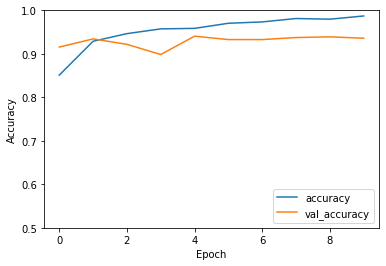

800/800 - 0s - loss: 0.4506 - accuracy: 0.9262


In [46]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(X_test,y_test, verbose=2)

In [49]:
print(test_acc)

0.92625


In [50]:
predictions = model.predict(X_test)

In [51]:
predictions

array([[9.9657696e-01, 3.4230000e-03],
       [1.2145663e-12, 1.0000000e+00],
       [7.5070602e-05, 9.9992490e-01],
       ...,
       [4.6137668e-02, 9.5386237e-01],
       [5.4975968e-05, 9.9994504e-01],
       [1.1919570e-03, 9.9880803e-01]], dtype=float32)

In [56]:
y_pred = model.predict_classes(X_test)

In [57]:
y_pred

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,

In [38]:
model.save('cnn_model.h5')

In [39]:
model = tf.keras.models.load_model('cnn_model.h5')

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 2546, 32)          192       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 1273, 32)          0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 1269, 32)          5152      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 634, 32)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 20288)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                324624    
_________________________________________________________________
dense_5 (Dense)              (None, 2)                

In [60]:
metrics.roc_auc_score(y_test,predictions)

0.947717731829574